# THE DEMOCRATIC REPUBLIC OF LITTLE DUCK ISLAND

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Area of Duck Island

<div>
    
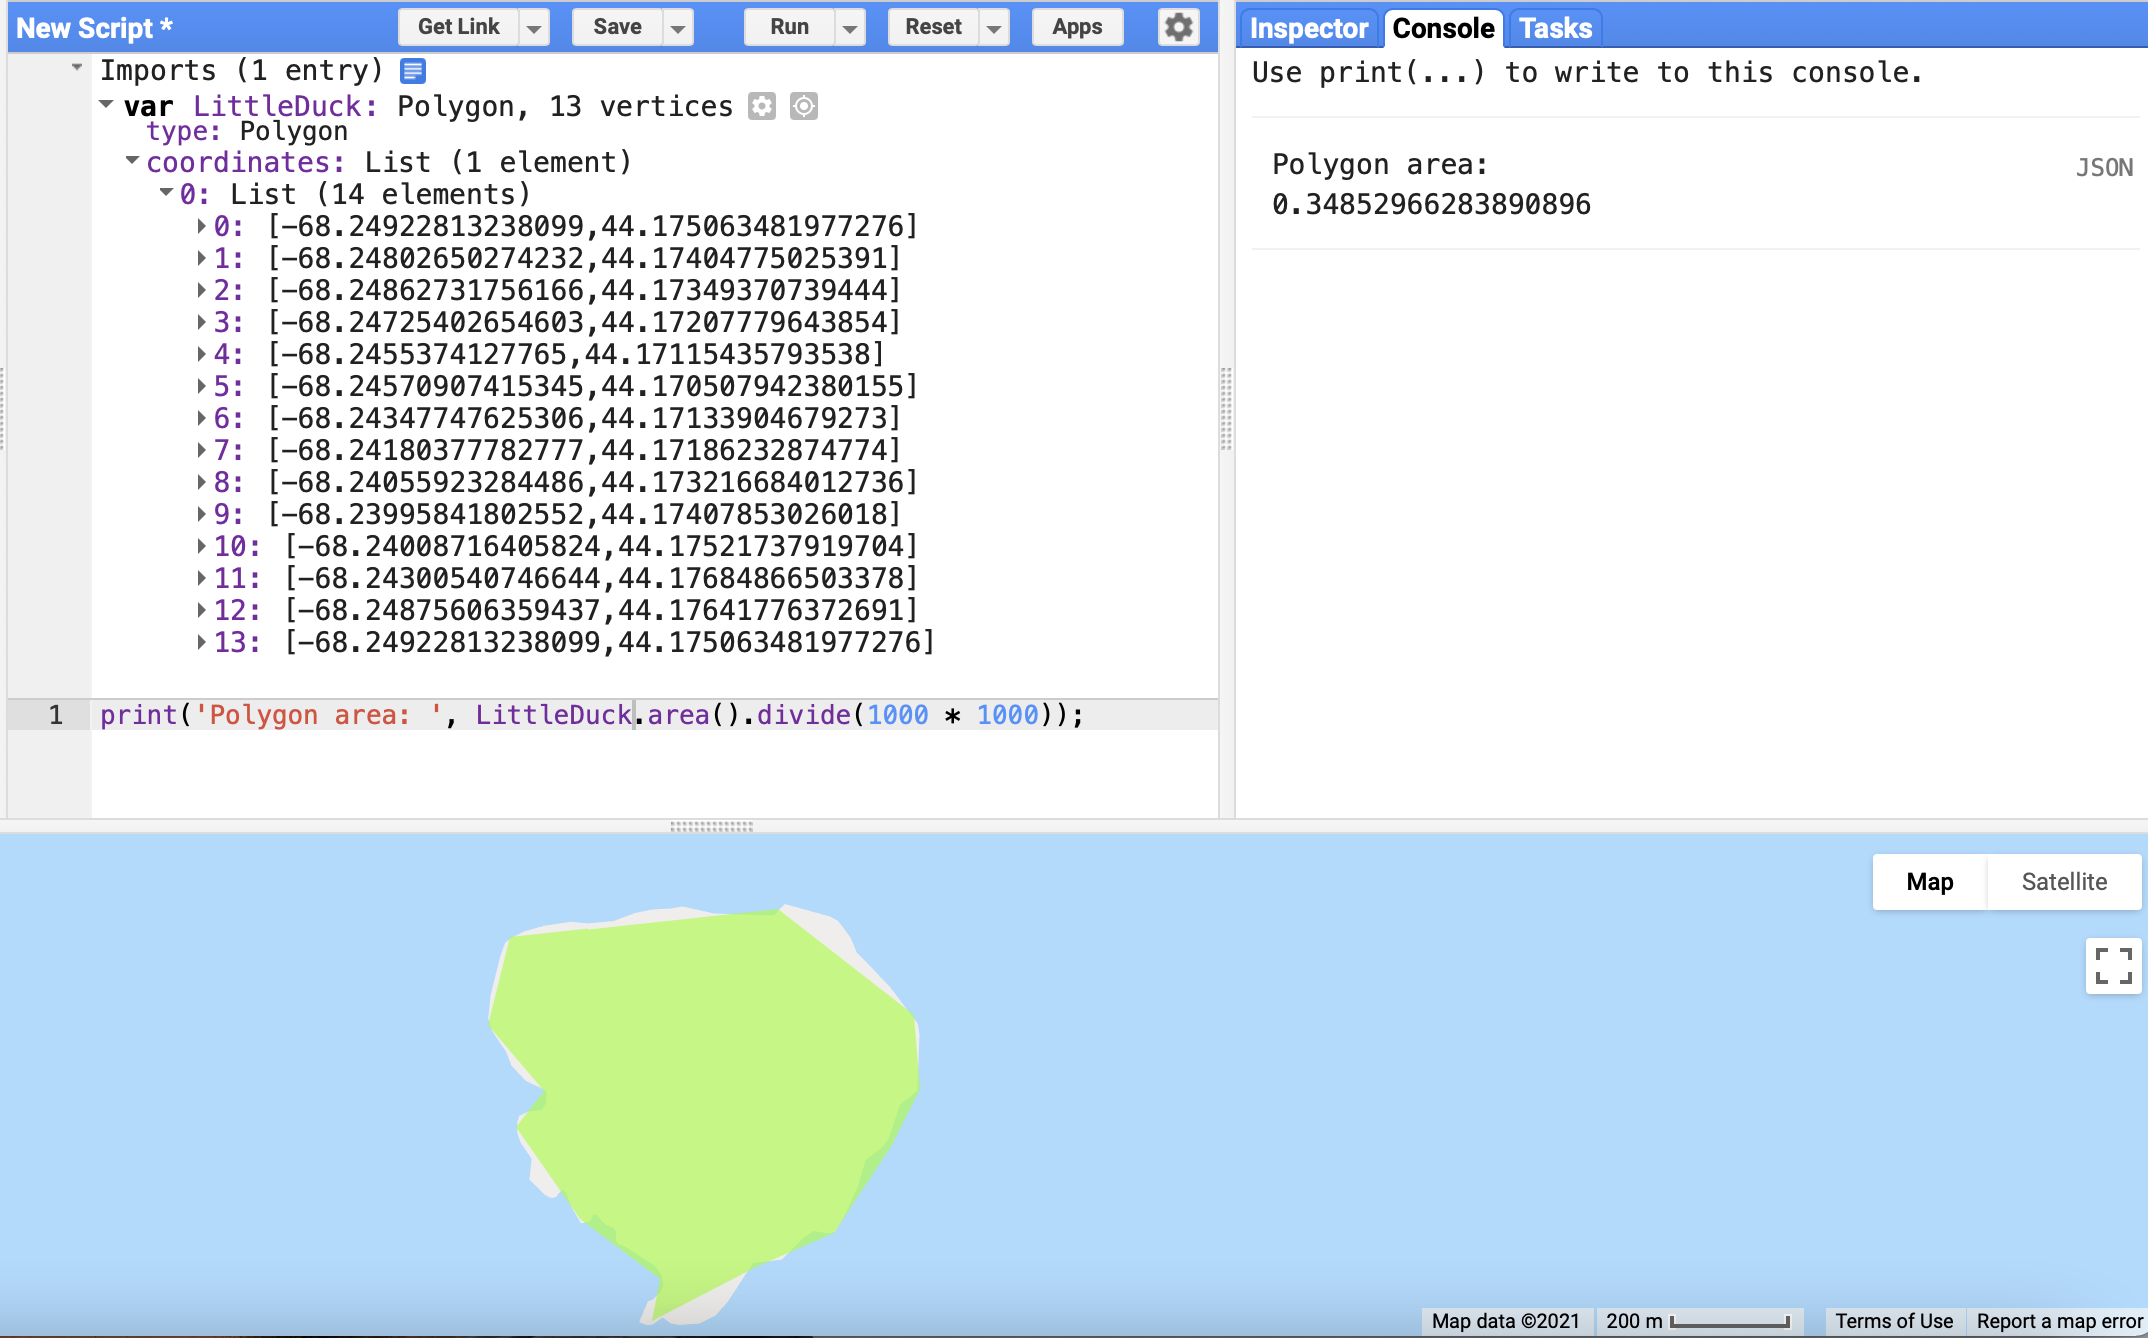
</div>

##### ~ 349,000 m^2

In [5]:
Avg_elec_load = 1 # W/ft**2
Heat_load = 6 # W/ft**2
Air_condition_load = 0 

In [6]:
class Info():
    def Trees():
        rho = 1/50 # tree/m^2
        regen_coEfficient = 0 
        Tree_BioMass = 1000 # kg
        E_perTree = 20 # kJ/g
        return rho, regen_coEfficient, Tree_BioMass, E_perTree
    
    def Solar():
        Irradiance = 4 # kWh/day/m**2
        return Irradiance
    
    def Crib():
        Area = 2000 # ft**2
        HeatPump_COP = 3.0 
        FirePlace_Efficiency = 0.7 # kJ/wood
        return Area, HeatPump_COP, FirePlace_Efficiency

### __Scenario 1:__
> **1)** In scenario 1, what is your yearly electricity and total energy requirement in kWh, and your yearly CO_2 production related to tree burning in kg , if you use only the fireplace during the heating season to heat the house.(30 pts)

> **2)** In scenario 1, what is your yearly electricity and total energy requirement in kWh, and your yearly CO_2 production related to tree burning in kg ,  if you only run the heat pump during the heating season remarkably. (30 pts) 

> **3)** For both of the above cases in scenario 1, how many years can you run this operation before you run out of trees? (20 pts)

In [7]:
                                                    
                                                    ### 1 ###
    

##### *Energy/Electricity Output Requirements*
$$ heating.kwh(area, 0<days<121): 6 * area $$

$$ heating.kwh(area, 122<days<365): 0 * area $$

$$ heating.kwh(2000, onDays): 34848 kWh$$

$$ heating.w(2000, onDays): 12000 W $$

$$ heating.kwh(2000, offDays): 0 kWh$$

$$ heating.w(2000, offDays): 0 W $$

$$ electricity.kwh(area): 1 * area $$

$$ electricity.kwh(2000): 17520 kWh $$

$$ electricity.w(2000): 2000 W $$

In [8]:
# Considering Generator with 0.5 efficiency of Carnot Effiecency that produces our electricity:

ReqElec_Output = 17520 # kWh

# heat-to-electric generator 
Th = 1000 # K
Tc = 293 # K
# convert heat to work at 1000K
CarnotE = (Th - Tc) / Th
GenEfficiency = 0.5 * CarnotE

#Heat requirement to produce required electricity given by:
ReqElec_Input = ReqElec_Output/GenEfficiency
print("The required annual energy input for matching electricity required is {} kwh.".format(round(ReqElec_Input,2)))

The required annual energy input for matching electricity required is 49561.53 kwh.


In [9]:
# Considering fireplace with 0.7 efficiency converting wood source to heat:

ReqHeat_Output = 34848

Fireplace_efficiency = 0.7
ReqHeat_Input = ReqHeat_Output / Fireplace_efficiency
print("The required annual energy input for matching heating required during dec-apr is {} kwh.".format(round(ReqHeat_Input,2)))

The required annual energy input for matching heating required during dec-apr is 49782.86 kwh.


### Now for CO<sub>2</sub> !

#### TREE ANALYSIS
> Assuming the total available biomass of trees on my island is convertible to energy: <br>
<br>
> Model energy by : 
<br> 
$$ E_{per Tree} = Mass_{Tree} * EnergyDensity $$
<br>
$$ E_{per Tree} = 20,000,000 kJ $$

In [10]:
# Calculating Energy available per tree
E_perTree = 20000000

P_watts_tree = E_perTree / 3600 # convert to kWh

print("Energy available on a per tree basis:\n -> {} kWh".format(round(P_watts_tree,2)))

Energy available on a per tree basis:
 -> 5555.56 kWh


In [11]:
# CALCULATING CO2 USING EFFICIENCY RATIO ON FUEL SOUCE INSTEAD OF MATCHING REQUIRED INPUT ENERGY EXPENDITURE

In [12]:
# for fireplace
TreeE_AvailableFireplace = P_watts_tree * Fireplace_efficiency
print("Heat energy produced by fireplace per tree:\n -> {} kWh".format(round(TreeE_AvailableFireplace,2)))

# given required heat output as ReqHeat_Output (34,848)...
No_Trees = ReqHeat_Output / TreeE_AvailableFireplace
print("\n \nI must chop {} trees down in order to meet my heating demand.".format(round(No_Trees)))

Heat energy produced by fireplace per tree:
 -> 3888.89 kWh

 
I must chop 9 trees down in order to meet my heating demand.


In [13]:
# for generator
TreeE_GeneratorConversion = P_watts_tree * GenEfficiency
print("Electric energy produced by generator per tree:\n -> {} kWh".format(round(TreeE_GeneratorConversion,2)))

# given required electric output as ReqElec_Output (17520)...
No_Trees = ReqElec_Output / TreeE_GeneratorConversion
print("\n \nI must chop {} trees down in order to meet my electricity demand.".format(round(No_Trees)))

Electric energy produced by generator per tree:
 -> 1963.89 kWh

 
I must chop 9 trees down in order to meet my electricity demand.


> *So in order to satisfy my minimum heating/electricity requirements I must chop down __18 trees per year.__*

In [14]:
# CO2 from Trees
Total_mass = 18 * Info.Trees()[2] * 1000
C_mm = 12.011
C_moles = Total_mass / C_mm

CO2_moles = C_moles
CO2_mm = 44.009 
CO2_mass = (CO2_moles * CO2_mm) / 1000

print("{} kg of CO2 produced during a one year cyle.".format(round(CO2_mass,2)))

65953.04 kg of CO2 produced during a one year cyle.


### 1| Solution

##### Yearly Input Electricity Requirement:  <font color=hotpink> __:__ __49561.53__ KWH </font> <br>
##### ~Yearly Convertible Heating Requirement~ <font color=hotpink> __:__ __49782.86__ KWH </font> <br>
##### TOTAL INPUT ENERGY REQUIREMENT <font color=hotpink>  __:__ __99,344.39__ KWH </font> 
##### Total CO2 Produced <font color=hotpink>  __:__ __65,953.04__ kg </font> 

In [15]:
    
                                                    ### 2 ###
    

In [16]:
# NOW INSTEAD OF FIREPLACE HEATING, I ADOPT HEAT PUMP HEATING
# heat pump takes *Electricity* and produces *Heat*

COP = 3.0
PumpElec_Input = ReqHeat_Output / COP
print("The pump requires {} kWh of electricity to produce {} kWh of Heat.".format(int(PumpElec_Input), ReqHeat_Output))

The pump requires 11616 kWh of electricity to produce 34848 kWh of Heat.


In [17]:
# Above covers heating requirements but not electric requirements, so factoring in generator
# requirements for total electricity:

TotalElec_InputReq = PumpElec_Input + ReqElec_Output 
GenHeat_Input = TotalElec_InputReq / GenEfficiency
print("The generator requires {} kWh of heat to produce {} kWh of electricity.".format(round(GenHeat_Input,2), round(TotalElec_InputReq,2)))

The generator requires 82421.5 kWh of heat to produce 29136.0 kWh of electricity.


Just a bit of overview:

> Yearly Elec. Consumption = 11616 + 17520
<br>
> Yearly Energy. Consumption = 82421.5

#### Now for CO2 Analysis based on Energy Consumption

In [18]:
# Generator supplies total electricity for both heating and consumption demands:
# Input heat is sourced from the burning of trees:

Nos_Trees = GenHeat_Input / P_watts_tree

print("I must chop {} trees down in order to meet my total energy demand.".format(round(Nos_Trees)))

I must chop 15 trees down in order to meet my total energy demand.


In [19]:
# CO2 from Trees
Total_mass = 15 * Info.Trees()[2] * 1000
C_mm = 12.011
C_moles = Total_mass / C_mm

CO2_moles = C_moles
CO2_mm = 44.009 
CO2_mass = (CO2_moles * CO2_mm) / 1000

print("{} kg of CO2 produced during a one year cyle.".format(round(CO2_mass,2)))

54960.87 kg of CO2 produced during a one year cyle.


### 2| Solution

##### Yearly Consumable Electricity Requirement:  <font color=hotpink> __:__ __29,136__ KWH </font> 
##### TOTAL ENERGY REQUIREMENT <font color=hotpink>  __:__ __82,421.50__ KWH </font> 
##### Total CO2 Produced <font color=hotpink>  __:__ __54,960.87__ kg </font> 

In [20]:

                                                 ### 3 ###


In [21]:
# CASE 1| To calculate longevity of my time on LDI
Trees_req = 18
Area_LDI = 349000 #m**2
TreeDensity = Info.Trees()[0]
House_Size = 185.81 #m**2 
ForestedArea = Area_LDI - House_Size

No_ofTreesLDI = ForestedArea * TreeDensity
print("There are {} trees on Little Duck Island (LDI)".format(round(No_ofTreesLDI)))

# If I need 18 trees x year in Case 1, then ->

Years_RunOutFire = No_ofTreesLDI / 18
print("\nI will run out of trees in {} years using the fireplace and generator.".format(round(Years_RunOutFire)))

There are 6976 trees on Little Duck Island (LDI)

I will run out of trees in 388 years using the fireplace and generator.


In [22]:
# CASE 2|
# If I need 15 trees x year to match total generation capabilities required, then ->

Years_RunOutPump = No_ofTreesLDI / 15
print("I will run out of trees in {} years using the generator and pump.".format(round(Years_RunOutPump)))

I will run out of trees in 465 years using the generator and pump.


### 3| Solution

##### Case 1 Years Before Resource Exhaustion:  <font color=hotpink> __:__ __388__ years </font> 
##### Case 2 Years Before Resource Exhaustion: <font color=hotpink>  __:__ __465__ years </font> 


In [23]:

                                                ### 4 ###


### Scenario 2 

> **4)** how much land do you need for solar PV in m^2, assuming you do not burn down any trees for heat? (20 pts)

1. 100% energy generation from Solar PV
2. Assume original 2,000 W electricity demand and 12,000 W heating demand.

In [24]:
# Energy vals that I need to match:
Elec_Reqs = 2000 # W
Heat_Reqs = 12000 # W
Tot_UnconvertedReqs = Elec_Reqs + Heat_Reqs

# Looking at Solar energy conversions now:
Irradiance = Info.Solar() # kWh/day/m^2
PanelEfficiency = 0.18


# Assuming 24 hour solar day 
Avg_Insolation = (Irradiance * 1000) / 24 # 24-hour solar day
Collected_PowerDensity = Avg_Insolation * PanelEfficiency 
print("The maximum harvestable energy from solar panel is {} W/m^2".format(round(Collected_PowerDensity)))

#LDI - Little Duck Island
LDI_SolarPowerArea = Tot_UnconvertedReqs / Collected_PowerDensity
print("\nNeeded area for matching energy requirements with solar panels is {} m^2".format(round(LDI_SolarPowerArea)))


The maximum harvestable energy from solar panel is 30 W/m^2

Needed area for matching energy requirements with solar panels is 467 m^2


### 4| Solution

##### Land Required:  <font color=hotpink> __:__ __467__ m<sup>2</sup> </font> 

In [25]:

                                                    ### 5 ###


> **5)** Estimate the amount of battery storage you need to install to smooth out the day night cycles year round. (10 pts)

1. Batteries are 100% efficient

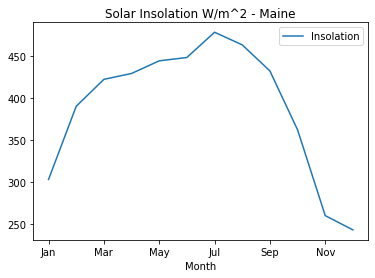

In [26]:
# Maine Monthly Irradiance (12-hour x day cycle)

Mon_SolarRadiation = pd.DataFrame([['Jan', 3.64, ], ['Feb', 4.68], ['Mar', 5.07], ['Apr', 5.15], ['May', 5.33], ['Jun', 5.37], ['Jul', 5.73], ['Aug', 5.56], ['Sep', 5.18], ['Oct', 4.34], ['Nov', 3.12], ['Dec', 2.92]], columns = ['Month', 'Insolation'])
#Insolation in kWh/day/m2
Insolation_Conversion = Mon_SolarRadiation['Insolation']
Converted_Insolation = [round(x * 1000 / 12) for x in Insolation_Conversion]
#Now Insolation in W/m2

Mon_SolarRadiation['Insolation'] = Converted_Insolation

Mon_SolarRadiation.plot(x='Month', y='Insolation')
plt.title('Solar Insolation W/m^2 - Maine')
plt.style.use('fivethirtyeight')
plt.show()

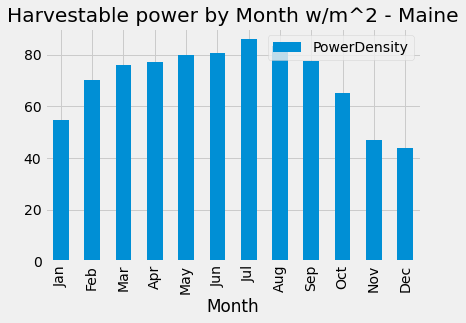

In [27]:
# Energy production cycles broken down by month:

# JAN
Jan = Mon_SolarRadiation.iloc[0]

Jan_Pd = Jan['Insolation'] * PanelEfficiency
# FEB
Feb = Mon_SolarRadiation.iloc[1]

Feb_Pd = Feb['Insolation'] * PanelEfficiency
# MAR
Mar = Mon_SolarRadiation.iloc[2]

Mar_Pd = Mar['Insolation'] * PanelEfficiency
# APR
Apr = Mon_SolarRadiation.iloc[3]

Apr_Pd = Apr['Insolation'] * PanelEfficiency
# MAY
May = Mon_SolarRadiation.iloc[4]

May_Pd = May['Insolation'] * PanelEfficiency
# JUN
Jun = Mon_SolarRadiation.iloc[5]

Jun_Pd = Jun['Insolation'] * PanelEfficiency
# JUL
Jul = Mon_SolarRadiation.iloc[6]

Jul_Pd = Jul['Insolation'] * PanelEfficiency
# AUG
Aug = Mon_SolarRadiation.iloc[7]

Aug_Pd = Aug['Insolation'] * PanelEfficiency
# SEP
Sep = Mon_SolarRadiation.iloc[8]

Sep_Pd = Sep['Insolation'] * PanelEfficiency
# OCT
Oct = Mon_SolarRadiation.iloc[9]

Oct_Pd = Oct['Insolation'] * PanelEfficiency
# NOV
Nov = Mon_SolarRadiation.iloc[10]

Nov_Pd = Nov['Insolation'] * PanelEfficiency
# DEC
Dec = Mon_SolarRadiation.iloc[11]

Dec_Pd = Dec['Insolation'] * PanelEfficiency

Pd_df = pd.DataFrame([['Jan', Jan_Pd], ['Feb', Feb_Pd], ['Mar', Mar_Pd],['Apr', Apr_Pd],['May', May_Pd],['Jun', Jun_Pd],['Jul', Jul_Pd],['Aug', Aug_Pd],['Sep', Sep_Pd],['Oct', Oct_Pd],['Nov', Nov_Pd],['Dec', Dec_Pd]], columns=['Month', 'PowerDensity'])
Pd_df.plot('Month', 'PowerDensity', kind='bar')
plt.title('Harvestable power by Month w/m^2 - Maine')
plt.style.use('fivethirtyeight')
plt.show()


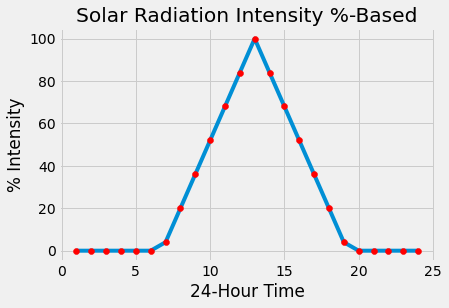

In [28]:
# Solar Intensity is directly correlated to the angle of solar radiation
def SolarIntenseCurve():
    global time, Percents
    time = [x for x in range(1,25)]
    Percents = [0,0,0,0,0,0,4,20,36,52,68,84,100,84,68,52,36,20,4,0,0,0,0,0]

    plt.plot(time, Percents, zorder=1)
    plt.scatter(time, Percents, zorder=2, color='r')
    
    plt.title('Solar Radiation Intensity %-Based')
    plt.xlabel('24-Hour Time')
    plt.ylabel('% Intensity')
    plt.style.use('fivethirtyeight')
    plt.show()
    plt.style.use('fivethirtyeight')
SolarIntenseCurve()

#### So out of the 24-hour day cycle, 12 hours deliver 0 electricity.


#### __requirements:__ 
1. Elec : 1 W/ft^2 (Jan-Dec)
2. Heating : 6 W/ft^2 (Dec-Apr)
3. House size: 2000 ft^2

> ElecDemand: 1 W/ft2 * 2000 ft2 = 2000 W<br>
> HeatingDemand: 6 W/ft2 * 2000 ft2 = 12000 W
<br>

Heating Energy Demand: 34848000 Wh (heating szn) <br>
Electricity Energy Demand: 17520000 Wh (year round)

Heating Energy Demand: 288000 Wh (x day during heating szn) <br>
Electricity Energy Demand: 48000 Wh (x day year round)


__USING SOLAR LAND REQUIREMENT FROM Q4)__ *But w/ a 12-hour window*



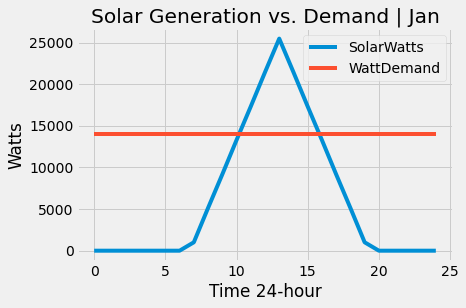

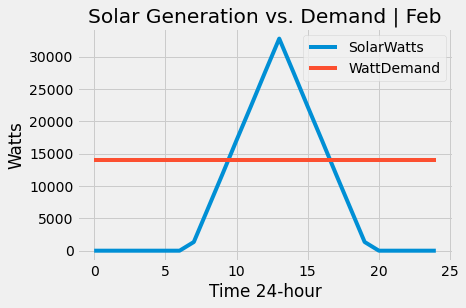

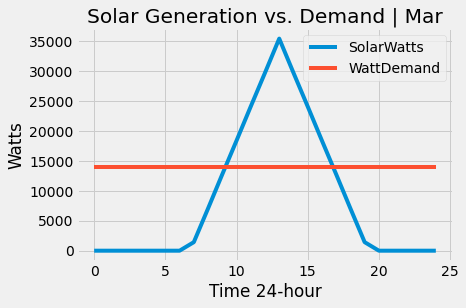

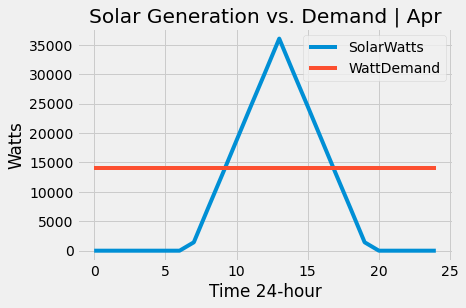

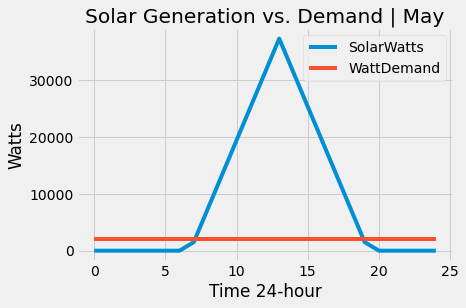

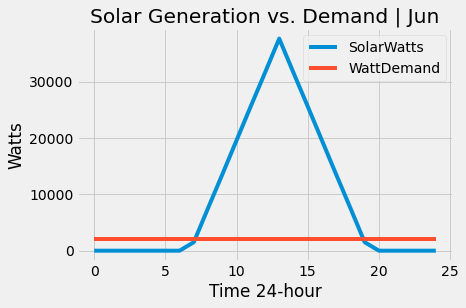

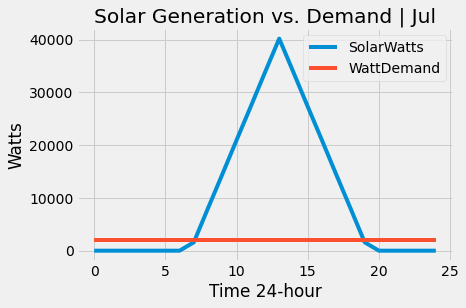

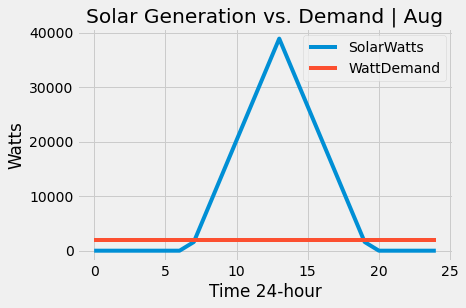

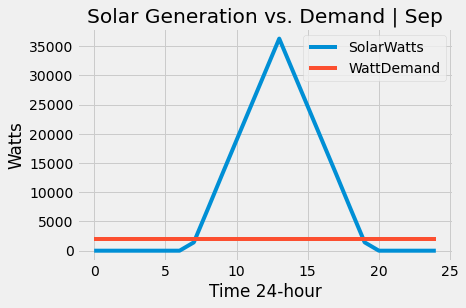

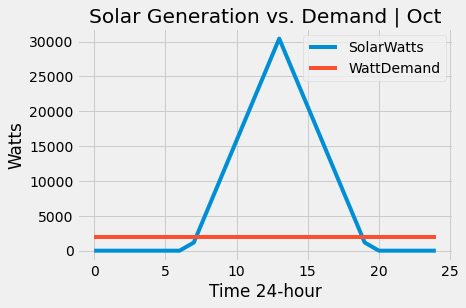

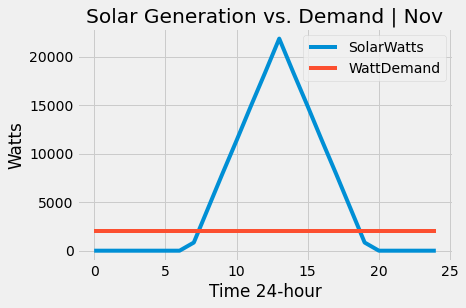

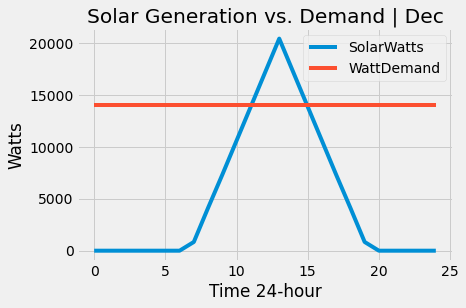

In [29]:
# Dec-Apr Calculations w/ Solar
PerDay_Demand = 14000 # watts

# function to break down 12-hour window into realistic intensities
def SolarDays(SolarMONTHpd):
    TwentyFourToOne = SolarMONTHpd * (Percents[0]/100)
    OneToTwoPD = SolarMONTHpd * (Percents[1]/100)
    TwoToThreePD = SolarMONTHpd * (Percents[2]/100)
    ThreeToFourPD = SolarMONTHpd * (Percents[3]/100)
    FourToFivePD = SolarMONTHpd * (Percents[4]/100)
    FiveToSixPD = SolarMONTHpd * (Percents[5]/100)
    SixToSevenPD = SolarMONTHpd * (Percents[6]/100)
    SevenToEightPD = SolarMONTHpd * (Percents[7]/100)
    EightToNinePD = SolarMONTHpd * (Percents[8]/100)
    NineToTennPD = SolarMONTHpd * (Percents[9]/100)
    TenToElevenPD = SolarMONTHpd * (Percents[10]/100)
    ElevenToTwelvePD = SolarMONTHpd * (Percents[11]/100)
    TwelveToThirtPD = SolarMONTHpd * (Percents[12]/100)
    ThirtToFourtPD = SolarMONTHpd * (Percents[13]/100)
    FourtToFiftPD = SolarMONTHpd * (Percents[14]/100)
    FiftToSixtPD = SolarMONTHpd * (Percents[15]/100)
    SixtToSeventPD = SolarMONTHpd * (Percents[16]/100)
    SeventToEighteenPD = SolarMONTHpd * (Percents[17]/100)
    EighteenToNinetPD = SolarMONTHpd * (Percents[18]/100)
    NinetToTwentyPD = SolarMONTHpd * (Percents[19]/100)
    TwentyToOnePD = SolarMONTHpd * (Percents[20]/100)
    TwentyToTwoPD = SolarMONTHpd * (Percents[21]/100)
    TwentyToThreePD = SolarMONTHpd * (Percents[22]/100)
    TwentyToFourPD = SolarMONTHpd * (Percents[23]/100)
    
    return list([TwentyFourToOne, OneToTwoPD, TwoToThreePD, TwoToThreePD, ThreeToFourPD, FourToFivePD, FiveToSixPD, SixToSevenPD, SevenToEightPD, EightToNinePD, NineToTennPD, TenToElevenPD, ElevenToTwelvePD, TwelveToThirtPD, ThirtToFourtPD, FourtToFiftPD, FiftToSixtPD, SixtToSeventPD, SeventToEighteenPD, EighteenToNinetPD, NinetToTwentyPD, TwentyToOnePD, TwentyToTwoPD, TwentyToThreePD, TwentyToFourPD])


month_insolation = [Jan['Insolation'],Feb['Insolation'],Mar['Insolation'],Apr['Insolation'],May['Insolation'],Jun['Insolation'],Jul['Insolation'],Aug['Insolation'],Sep['Insolation'],Oct['Insolation'],Nov['Insolation'],Dec['Insolation']]

def GrouperFunc(varM):
    # Takes Calculated Fractional Insolation based upon time-of-day and converts to W/m2
    NewList = []
    for x in SolarDays(month_insolation[varM]):
        Insol = round(x) # W/m2
        EHarvest = Insol * PanelEfficiency * 467 # W
        NewList.append(EHarvest)
    return NewList

GrouperFunc(0)
# print('Daily Generative Capabilities for January is {} W.'.format(GrouperFunc(0)))
# print('Daily Generative Capabilities for February is {} W.'.format(GrouperFunc(1)))
# print('Daily Generative Capabilities for March is {} W.'.format(GrouperFunc(2)))
# print('Daily Generative Capabilities for April is {} W.'.format(GrouperFunc(3)))
# print('Daily Generative Capabilities for December is {} W.'.format(GrouperFunc(4)))

    
#Create two plots and distance between them is battery storage required

listoNos = []

for x in range(0,25):
    listoNos.append(14000)
    
listoPos = []

for y in range(0,25):
    listoPos.append(2000)
    
#-------------------
JanuaryTest = pd.DataFrame([GrouperFunc(0), listoNos]).T

JanuaryReal = JanuaryTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

JanuaryReal.plot()
plt.title('Solar Generation vs. Demand | Jan')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
FebruaryTest = pd.DataFrame([GrouperFunc(1), listoNos]).T

FebruaryReal = FebruaryTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

FebruaryReal.plot()
plt.title('Solar Generation vs. Demand | Feb')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
MarchTest = pd.DataFrame([GrouperFunc(2), listoNos]).T

MarchReal = MarchTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

MarchReal.plot()
plt.title('Solar Generation vs. Demand | Mar')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
AprilTest = pd.DataFrame([GrouperFunc(3), listoNos]).T

AprilReal = AprilTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

AprilReal.plot()
plt.title('Solar Generation vs. Demand | Apr')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
MayTest = pd.DataFrame([GrouperFunc(4), listoPos]).T

MayReal = MayTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

MayReal.plot()
plt.title('Solar Generation vs. Demand | May')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
JuneTest = pd.DataFrame([GrouperFunc(5), listoPos]).T

JuneReal = JuneTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

JuneReal.plot()
plt.title('Solar Generation vs. Demand | Jun')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
JulyTest = pd.DataFrame([GrouperFunc(6), listoPos]).T

JulyReal = JulyTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

JulyReal.plot()
plt.title('Solar Generation vs. Demand | Jul')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
AugustTest = pd.DataFrame([GrouperFunc(7), listoPos]).T

AugustReal = AugustTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

AugustReal.plot()
plt.title('Solar Generation vs. Demand | Aug')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
SeptemberTest = pd.DataFrame([GrouperFunc(8), listoPos]).T

SeptemberReal = SeptemberTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

SeptemberReal.plot()
plt.title('Solar Generation vs. Demand | Sep')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
OctoberTest = pd.DataFrame([GrouperFunc(9), listoPos]).T

OctoberReal = OctoberTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

OctoberReal.plot()
plt.title('Solar Generation vs. Demand | Oct')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
NovemberTest = pd.DataFrame([GrouperFunc(10), listoPos]).T

NovemberReal = NovemberTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

NovemberReal.plot()
plt.title('Solar Generation vs. Demand | Nov')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()
#-------------------
DecemberTest = pd.DataFrame([GrouperFunc(11), listoNos]).T

DecemberReal = DecemberTest.rename({0:'SolarWatts', 1:'WattDemand'}, axis='columns')

DecemberReal.plot()
plt.title('Solar Generation vs. Demand | Dec')
plt.xlabel('Time 24-hour')
plt.ylabel('Watts')
plt.show()

### It's clear to see that harvestable watts fluxuates dependant on the month. 

In [30]:
# a, b, c, d = points of intersection between demand and solar watts curve used to calculate oversupply/undersupply
# HEATING SZN

a = [10.06, 14000]
b = [15.94, 14000]
Base = math.dist(a,b)
Height = 25250 - 14000
OverSupplyW = round((Base * Height) / 2)
print('From 10am to 4pm, the solar panels oversupply {} W of electricity'.format(OverSupplyW))

c = [7, 1008]
d = [7, 14000]

BaseUnder = math.dist(d,a)
HeightUnder = math.dist(d, c)
UnderSupplyHeat = round((BaseUnder * HeightUnder) / 2)
print('From 6pm < time < 6am, the demand is undersupplied by {} W of electricity'.format(UnderSupplyHeat))


From 10am to 4pm, the solar panels oversupply 33075 W of electricity
From 6pm < time < 6am, the demand is undersupplied by 19878 W of electricity


In [31]:
# w, x = points of intersection between demand and solar watts curve used to calculate undersupply

w = [7.1, 2000]
x = [18.9, 2000]
y = [6,1600]
BaseWX = math.dist(w,x)
HeightWY = 2000-1600
UnderSupplyNoHeat = round((BaseWX * HeightWY) / 2)
print('From 6pm < time < 6am, the demand is undersupplied by {} W of electricity'.format(UnderSupplyNoHeat))


From 6pm < time < 6am, the demand is undersupplied by 2360 W of electricity


## Now, take Li-ion batteries as our super-efficient storage device -->

> Power Density of Li-ion batteries (source: cei.washington.edu): 250-270 Wh/kg

In [32]:
# BATTERIES MUST HARVEST >19878 W OF ENERGY IN ORDER TO BALANCE THE DAY-AND-NIGHT SHIFTS
# Take Lithium Ion Battery with 250 Wh/kg Energy Density

BatteryPD = 250 * 12 # W/kg - 12hour cycle for batteries

TotalBatteryStorageReq = round(UnderSupplyHeat / BatteryPD, 2) # cancel Wh to produce kg

TotBatStoReq = round(UnderSupplyNoHeat / BatteryPD, 2)

print("I will need {} kg of Li-ion batteries to account for my day-night imbalance w/ solar during the heating season.".format(TotalBatteryStorageReq))

print("I will need {} kg of Li-ion batteries to account for my day-night imbalance w/ solar during the non-heating season.".format(TotBatStoReq))

I will need 6.63 kg of Li-ion batteries to account for my day-night imbalance w/ solar during the heating season.
I will need 0.79 kg of Li-ion batteries to account for my day-night imbalance w/ solar during the non-heating season.
